In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load CSV file into a DataFrame
df = pd.read_csv('new_data.csv')

# Display the first few rows of the DataFrame
print(df.head())


               Country ISO3   1961   1962   1963   1964   1965   1966   1967  \
0              Albania  ALB  0.627  0.326  0.075 -0.166 -0.388  0.559 -0.074   
1              Algeria  DZA  0.164  0.114  0.077  0.250 -0.100  0.433 -0.026   
2       American Samoa  ASM  0.079 -0.042  0.169 -0.140 -0.562  0.181 -0.368   
3               Angola  AGO  0.041 -0.152 -0.190 -0.229 -0.196  0.175 -0.081   
4  Antigua and Barbuda  ATG  0.090  0.031  0.288  0.214 -0.385  0.097 -0.192   

    1968  ...   2017   2018   2019   2020   2021   2022  \
0  0.081  ...  1.121  2.028  1.675  1.498  1.536  1.518   
1 -0.067  ...  1.512  1.210  1.115  1.926  2.330  1.688   
2 -0.187  ...  1.435  1.189  1.539  1.430  1.268  1.256   
3 -0.193  ...  0.870  1.395  1.752  1.162  1.553  1.212   
4 -0.225  ...  0.958  0.627  0.797  1.131  0.862  0.770   

                   Sub-Region         Income Group  Area (KM²)  Density (KM²)  
0       Europe & Central Asia  Upper middle income     28748.0            103  
1  M

In [3]:
df_num = df.select_dtypes(include= np.number)
df_num.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2015,2016,2017,2018,2019,2020,2021,2022,Area (KM²),Density (KM²)
0,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518,28748.0,103
1,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688,2381741.0,19
2,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256,199.0,220
3,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,0.248,...,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212,1246700.0,29
4,0.090,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,0.271,0.109,...,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.770,442.0,214


In [4]:
X = df_num
y = df["Sub-Region"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [8]:
# modelo de voting 

## instanciar nossos modelos de classificação
lr = LogisticRegression(random_state = 2, solver = "lbfgs")
svc = SVC(random_state = 2, max_iter = 10000, kernel = "poly", degree = 5, C = 10000)

modelo = VotingClassifier(
    [
        ("lr", lr), 
        ("svc", svc)
    ]
)

In [9]:
modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

TREINO
                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00        17
     Europe & Central Asia       0.31      1.00      0.47        28
 Latin America & Caribbean       0.27      0.24      0.26        25
Middle East & North Africa       0.00      0.00      0.00        12
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         5
        Sub-Saharan Africa       0.00      0.00      0.00        24

                  accuracy                           0.30       112
                 macro avg       0.08      0.18      0.10       112
              weighted avg       0.14      0.30      0.18       112



C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

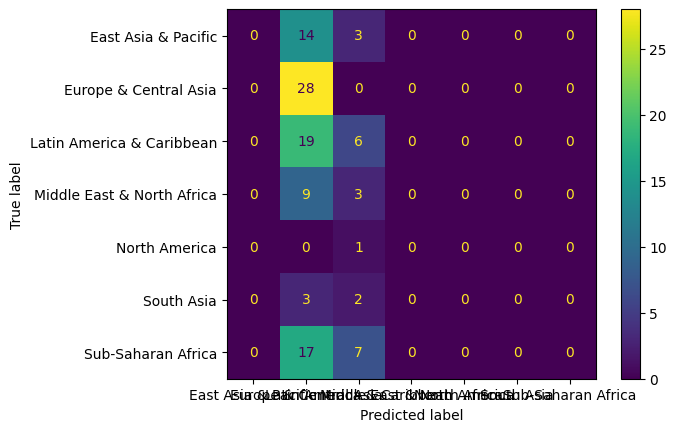



TESTE
                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00         4
     Europe & Central Asia       0.26      0.86      0.40         7
 Latin America & Caribbean       0.17      0.17      0.17         6
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         2
        Sub-Saharan Africa       0.00      0.00      0.00         6

                  accuracy                           0.24        29
                 macro avg       0.06      0.15      0.08        29
              weighted avg       0.10      0.24      0.13        29



C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

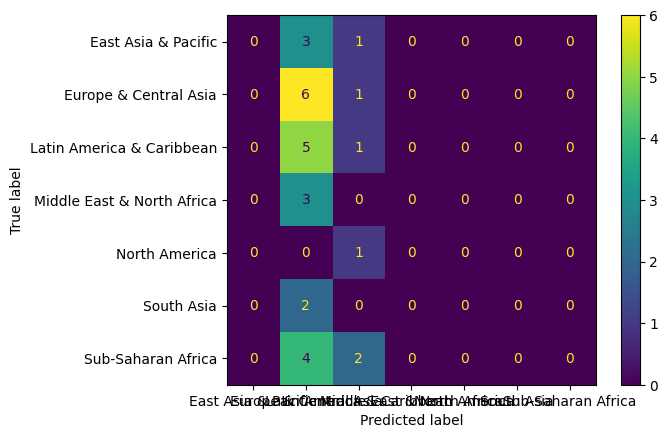

In [11]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
print(ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train))
plt.show()

print("\n")
print("TESTE")
print(classification_report(y_test, y_pred_test))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
gbc = GradientBoostingClassifier(
    learning_rate = 0.1, 
    n_estimators = 100,
    max_depth = 3
)

In [16]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [17]:
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

TREINO
                            precision    recall  f1-score   support

       East Asia & Pacific       1.00      1.00      1.00        17
     Europe & Central Asia       1.00      1.00      1.00        28
 Latin America & Caribbean       1.00      1.00      1.00        25
Middle East & North Africa       1.00      1.00      1.00        12
             North America       1.00      1.00      1.00         1
                South Asia       1.00      1.00      1.00         5
        Sub-Saharan Africa       1.00      1.00      1.00        24

                  accuracy                           1.00       112
                 macro avg       1.00      1.00      1.00       112
              weighted avg       1.00      1.00      1.00       112



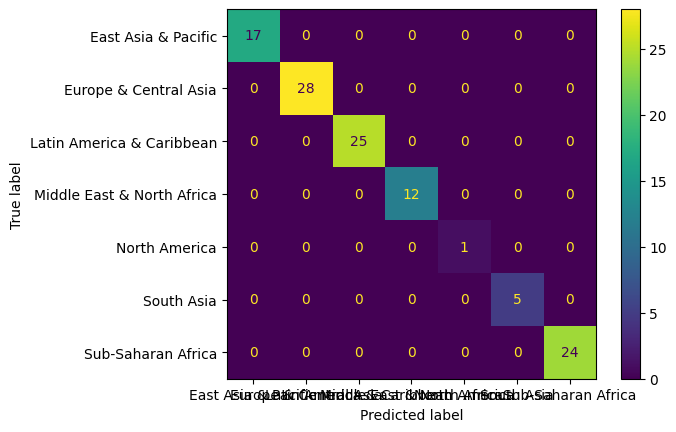

TESTE
                            precision    recall  f1-score   support

       East Asia & Pacific       1.00      0.50      0.67         4
     Europe & Central Asia       1.00      0.86      0.92         7
 Latin America & Caribbean       0.86      1.00      0.92         6
Middle East & North Africa       1.00      0.33      0.50         3
             North America       1.00      1.00      1.00         1
                South Asia       1.00      0.50      0.67         2
        Sub-Saharan Africa       0.55      1.00      0.71         6

                  accuracy                           0.79        29
                 macro avg       0.91      0.74      0.77        29
              weighted avg       0.88      0.79      0.78        29



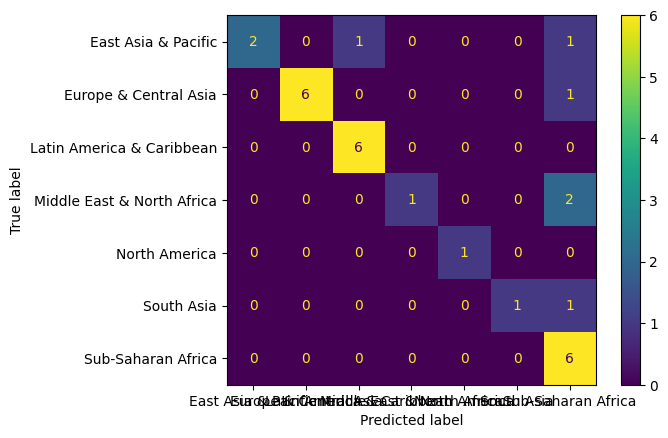

In [18]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("TESTE")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [19]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.3/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.5/99.8 MB 2.7 MB/s eta 0:00:37
   ---------------------------------------- 0.7/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 1.0/99.8 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.3/99.8 MB 4.7 MB/s eta 0:00:22
    --------------------------------------- 1.7/99.8 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 2.0/99.8 MB 5.7 MB/s eta 0:00:18
    --------------------------------------- 2.3/99.8 MB 6.1 MB/s eta 0:00:17
   - -------------------------------------- 2.5/99.8 MB 6.0 MB/s eta 0:00:17
   - ----